<a href="https://colab.research.google.com/github/Allen001822480/Info7374SpringTeam5/blob/Assignment4/Assignment4_seq2seq_5_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/Phylliida/Dialogue-Datasets

fatal: destination path 'Dialogue-Datasets' already exists and is not an empty directory.


In [0]:
import re
tw = open('TwitterLowerAsciiCorpus.txt')
twitter = tw.read()
data = [d for d in twitter.split('\n')]
data = [d for d in data if d != '']
#data = eval('[%s]'%repr(data).replace('[', '').replace(']', ''))
data = list(map(lambda x:re.sub(r'^A-Za-z\d\s\,\.\!\?\'\"\+\-','',x), data))
print(data[0:5])

["what's up dadyo when did you get back on twitter? haha", "like 2 weeks ago and it's going as terribly as i remember, but deg is still hilarious so it's ok", 'literally never about that account, love it.', 'answer me this fellow apple peoples: how many times in the past year have you used the escape key?', 'about 50 times today. terminal vim user.']


In [0]:
l1 = ['won’t','won\'t','wouldn’t','wouldn\'t','’m', '’re', '’ve', '’ll', '’s','’d', 'n’t', '\'m', '\'re', '\'ve', '\'ll', '\'s', '\'d', 'can\'t', 'n\'t', 'B: ', 'A: ', ',', ';', '.', '?', '!', ':', '. ?', ',   .', '. ,', 'STA', 'END', 'sta', 'end']
l2 = ['will not','will not','would not','would not',' am', ' are', ' have', ' will', ' is', ' had', ' not', ' am', ' are', ' have', ' will', ' is', ' had', 'can not', ' not', '', '', ' ,', ' ;', ' .', ' ?', ' !', ' :', '? ', '.', ',', '', '', '', '']

for i, raw_word in enumerate(data):
    for j, term in enumerate(l1):
        raw_word = raw_word.replace(term,l2[j])
    
    data[i] = raw_word.lower()
    

In [0]:
data = list(map(lambda x:'STA '+x+' END', data))
context = data[::2]
answers = data[1::2]
all = context + answers

In [0]:
!pip install vaderSentiment

In [0]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
context_sentiments = []
answers_sentiments = []
for sentence in context:
  vs = analyzer.polarity_scores(sentence)
  context_sentiments.append(vs['neg'])
'''
for sentence in answers:
  vs = analyzer.polarity_scores(sentence)
  answers_sentiments.append(vs['pos'])
'''
print(context_sentiments)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.368, 0.0, 0.0, 0.0, 0.0, 0.195, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.101, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.524, 0.0, 0.0, 0.524, 0.0, 0.0, 0.0, 0.0, 0.0, 0.153, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.086, 0.0, 0.0, 0.0, 0.082, 0.0, 0.0, 0.134, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.123, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.268, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.524, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.168, 0.0, 0.0, 0.0, 0.0, 0.076, 0.231, 0.113, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.141, 0.0, 0.0, 0.0, 0.0, 0.0, 0.235, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.281, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.209, 0.141, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.48, 0.0, 0.0, 0.0, 0.0, 0.0, 0.358, 0.0, 0.0, 0.0, 0.0, 0.0,

In [0]:
import nltk
import itertools
from keras.preprocessing import sequence
vocabulary_file = 'vocabulary_twitter'
padded_context_file = 'Padded_context'
padded_answers_file = 'Padded_answers'
unknown_token = 'something'

vocabulary_size = 10000
max_features = vocabulary_size
maxlen_input = 50
maxlen_output = 50  # cut texts after this number of words

all = ' '.join(all)
tokenized_all = all.split()
tokenized_context = [t.split() for t in context]
tokenized_answers = [t.split() for t in answers]

word_freq = nltk.FreqDist(itertools.chain(tokenized_all))
print ("Found %d unique words tokens." % len(word_freq.items()))


Using TensorFlow backend.


Found 20558 unique words tokens.


In [0]:
import pickle
vocab = word_freq.most_common(vocabulary_size-1)
with open(vocabulary_file, 'wb') as v:
  pickle.dump(vocab, v)

print(vocab[0:20])

[('STA', 50000), ('END', 50000), ('i', 11864), ('is', 11570), ('you', 9721), ('it', 9466), ('the', 9461), ('not', 7981), ('and', 7366), ('that', 6562), ('a', 6493), ('to', 6405), ('have', 4871), ('do', 3927), ('in', 3922), ('of', 3704), ('yeah', 3608), ('are', 3315), ('they', 3195), ('he', 3166)]


In [0]:
vocab = pickle.load(open(vocabulary_file, 'rb'))
index_to_word = [x[0] for x in vocab]
index_to_word.append(unknown_token)
word_to_index = dict([(w,i) for i,w in enumerate(index_to_word)])

print ("Using vocabulary of size %d." % vocabulary_size)
print ("The least frequent word in our vocabulary is '%s' and appeared %d times." % (vocab[-1][0], vocab[-1][1]))


Using vocabulary of size 10000.
The least frequent word in our vocabulary is 'smokeslily' and appeared 1 times.


In [0]:
import numpy as np
# Replacing all words not in our vocabulary with the unknown token:
for i, sent in enumerate(tokenized_answers):
  tokenized_answers[i] = [w if w in word_to_index else unknown_token for w in sent]
   
for i, sent in enumerate(tokenized_context):
  tokenized_context[i] = [w if w in word_to_index else unknown_token for w in sent]

# Creating the training data:
X = np.asarray([[word_to_index[w] for w in sent] for sent in tokenized_context])
Y = np.asarray([[word_to_index[w] for w in sent] for sent in tokenized_answers])

Q = sequence.pad_sequences(X, maxlen=maxlen_input, padding='post')
A = sequence.pad_sequences(Y, maxlen=maxlen_output, padding='post')

row, col = Q.shape
for i in range(row):
  Q[i,:] = Q[i,:]*context_sentiments[i]


with open(padded_context_file, 'wb') as q:
    pickle.dump(Q, q)
    
with open(padded_answers_file, 'wb') as a:
    pickle.dump(A, a)

In [0]:
print(Q.shape)

(25000, 50)


In [0]:
import requests
file_url = "http://nlp.stanford.edu/data/glove.6B.zip"
tr = requests.get(file_url, stream=True)
with open("glove.6B.zip", "wb") as f:
    for chunk in tr.iter_content(chunk_size=1024):
        if chunk:
            f.write(chunk)
            
            
import zipfile
import os
def un_zip(file_name):
    """unzip zip file"""
    zip_file = zipfile.ZipFile(file_name)
    if os.path.isdir(file_name + "_files"):
        pass
    else:
        os.mkdir(file_name + "_files")
    for names in zip_file.namelist():
        zip_file.extract(names,file_name + "_files/")
    zip_file.close()
        
glove = un_zip("glove.6B.zip")

In [0]:
padded_context_file = 'Padded_context'
padded_answers_file = 'Padded_answers'
unknown_token = 'something'
word_embedding_size = 100
sentence_embedding_size = 300
dictionary_size = 10000
maxlen_input = 50
maxlen_output = 50
num_subsets = 10
Epochs = 50
BatchSize = 128 
Patience = 0
dropout = .2
n_test = 100

In [0]:
import _pickle
import numpy as np

embeddings_index = {}
f = open('./glove.6B.zip_files/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))
embedding_matrix = np.zeros((dictionary_size, word_embedding_size))

# Loading our vocabulary:
vocabulary = _pickle.load(open(vocabulary_file, 'rb'))

# Using the Glove embedding:
i = 0
for word in vocabulary:
    embedding_vector = embeddings_index.get(word[0])
    
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
    i += 1
    
print(embedding_matrix)

Found 400000 word vectors.
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.046539    0.61966002  0.56647003 ... -0.37616    -0.032502
   0.80620003]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [0]:
from keras.layers import Input, Embedding, LSTM, Dense, RepeatVector, Bidirectional, Dropout, concatenate
from keras.optimizers import Adam, SGD
from keras.models import Model
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.callbacks import EarlyStopping
from keras.preprocessing import sequence
import keras.backend as K
import os
import theano.tensor as T
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt

weights_file = 'assignment4_twitter_neg.h5'
ad = Adam(lr=0.00005) 

input_context = Input(shape=(maxlen_input,), name='input_context')
input_answer = Input(shape=(maxlen_input,), name='input_answer')
LSTM_encoder = LSTM(sentence_embedding_size, init= 'lecun_uniform')
LSTM_decoder = LSTM(sentence_embedding_size, init= 'lecun_uniform')
if os.path.isfile(weights_file):
    Shared_Embedding = Embedding(output_dim=word_embedding_size, input_dim=dictionary_size, input_length=maxlen_input)
else:
    Shared_Embedding = Embedding(output_dim=word_embedding_size, input_dim=dictionary_size, weights=[embedding_matrix], input_length=maxlen_input)
word_embedding_context = Shared_Embedding(input_context)
context_embedding = LSTM_encoder(word_embedding_context)

word_embedding_answer = Shared_Embedding(input_answer)
answer_embedding = LSTM_decoder(word_embedding_answer)

merge_layer = concatenate([context_embedding, answer_embedding])
out = Dense(int(dictionary_size/2), activation="relu")(merge_layer)
out = Dense(dictionary_size, activation="softmax")(out)

model = Model(input=[input_context, input_answer], output = [out])

model.compile(loss='categorical_crossentropy', optimizer=ad)

if os.path.isfile(weights_file):
    model.load_weights(weights_file)
    
model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(300, kernel_initializer="lecun_uniform")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(300, kernel_initializer="lecun_uniform")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_context (InputLayer)      (None, 50)           0                                            
__________________________________________________________________________________________________
input_answer (InputLayer)       (None, 50)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 50, 100)      1000000     input_context[0][0]              
                                                                 input_answer[0][0]               
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 300)          481200      embedding_1[0][0]                
__________

In [0]:
q = _pickle.load(open(padded_context_file, 'rb'))
a = _pickle.load(open(padded_answers_file, 'rb'))
n_exem, n_words = a.shape

print('Number of exemples = %d'%(n_exem))
step = int(np.around(n_exem/num_subsets))
round_exem = int(step * num_subsets)
print(step, round_exem)

Number of exemples = 25000
2500 25000


In [0]:
def print_result(input):
  ans_partial = np.zeros((1,maxlen_input))
  ans_partial[0,-1] = 0 #index of STA
  for k in range(maxlen_input - 1):
    ye = model.predict([input, ans_partial])
    mp = np.argmax(ye)
    ans_partial[0, 0:-1] = ans_partial[0, 1:]
    ans_partial[0, -1] = mp
  text = ''
  for k in ans_partial[0]:
    k = k.astype(int)
    if k < (dictionary_size-2):
      w = vocabulary[k]
      text = text + w[0] + ' '
  return(text)
  

In [0]:
x = range(0,Epochs) 
valid_loss = np.zeros(Epochs)
train_loss = np.zeros(Epochs)
for m in range(Epochs):
  # Loop over training batches due to memory constraints:
  for n in range(0,round_exem,step):
    q2 = q[n:n+step]
    s = q2.shape
    count = 0
    for i, sent in enumerate(a[n:n+step]):
      l = np.where(sent==1)
      limit = l[0][0]
      count += limit + 1
    Q = np.zeros((count,maxlen_input))
    A = np.zeros((count,maxlen_input))
    Y = np.zeros((count,dictionary_size))
    
    count = 0
    for i, sent in enumerate(a[n:n+step]):
      ans_partial = np.zeros((1,maxlen_input))
      # Loop over the positions of the current target output (the current output sequence):
      l = np.where(sent==1)
      limit = l[0][0]
      for k in range(1,limit+1):
        # Mapping the target output (the next output word) for one-hot codding:
        y = np.zeros((1, dictionary_size))
        y[0, sent[k]] = 1
        # preparing the partial answer to input:
        ans_partial[0,-k:] = sent[0:k]
        # training the model for one epoch using teacher forcing:
        Q[count, :] = q2[i:i+1] 
        A[count, :] = ans_partial 
        Y[count, :] = y
        count += 1
    print('Training epoch: %d, training examples: %d - %d'%(m,n, n + step))
    model.fit([Q, A], Y, batch_size=BatchSize, epochs=1)
    test_input = q[6:7]
    print(print_result(test_input))
  model.save_weights(weights_file, overwrite=True)

Training epoch: 0, training examples: 0 - 2500
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
30123/30123 [==============================] - 91s 3ms/step - loss: 6.8002
STA i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i i be END END END END END END END END END END 
Training epoch: 0, training examples: 2500 - 5000
Epoch 1/1
20594/20594 [==============================] - 57s 3ms/step - loss: 5.0909
STA i END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END 
Training epoch: 0, training examples: 5000 - 7500
Epoch 1/1
20302/20302 [==============================] - 56s 3ms/step - loss: 4.7837
STA yeah END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END END 
Training epoch: 0, traini

KeyboardInterrupt: ignored

In [0]:
y_pred = list()
y_test = list()
y_pred_labels = list()
y_test_labels = list()
for i in range(100):
  print('input: %s'%context[i].replace('STA','').replace('END',''))
  in_vs = analyzer.polarity_scores(context[i])
  y_test.append(in_vs['neg'])
  y_test_labels.append(max(in_vs, key=in_vs.get))
  
  output = print_result(q[i:i+1])
  output = output.replace('STA','')
  output = re.split('END',output)[0]
  out_vs = analyzer.polarity_scores(output)
  y_pred.append(out_vs['neg'])
  y_pred_labels.append(max(in_vs, key=out_vs.get))
  print('output: %s'%output)

input:  what's up dadyo when did you get back on twitter? haha 
output:  i do not know 
input:  literally never about that account, love it. 
output:  i do not know 
input:  about 50 times today. terminal vim user. 
output:  i do not know 
input:  cmd+opt+esc is good but still available via menubar 
output:  i do not know 
input:  i'm disgusted 
output:  i do not know 
input:  what a piece of shit 
output:  i do not know 
input:  yay, you great hunter. ive killed lots of lizards and bugs but never a mouse. 
output:  i do not know 
input:  and then that mouse had the nerve to try to eat our kibble!  let this be a lesson fur all the other mousies!   
output:  i do not know 
input:  tomorrow 
output:  i do not know 
input:  make sure i have a bed and seat saved next to you! 
output:  i do not know 
input:  wassup shorty.  
output:  i think it is a good way 
input:  appreciate that shorty, you too.  
output:  i do not know 
input:  yea 
output:  i do not know 
input:  gotchu 
output:  i do

In [0]:
for l in range(len(y_test_labels)):
  if y_test_labels[l] != 'neg':
     y_test_labels[l]= 'not_neg'
print(y_test_labels)
for l in range(len(y_pred_labels)):
  if y_pred_labels[l] != 'neg':
     y_pred_labels[l]= 'not_neg'
print(y_pred_labels)

['not_neg', 'not_neg', 'not_neg', 'not_neg', 'neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_neg', 'not_n

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, 
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[ 0  2]
 [ 0 98]]


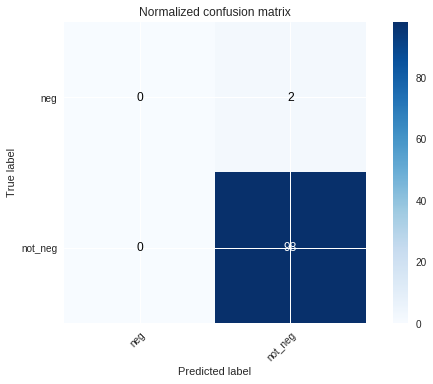

In [0]:
plot_confusion_matrix(y_test_labels, y_pred_labels, normalize=False,
                      title='Normalized confusion matrix')
plt.show()

In [0]:
print(y_pred)
print(y_test)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.271, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.531, 0.419, 0.134, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.286, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.198, 0.099, 0.0, 0.213, 0.255, 0.0, 0.134, 0.0, 0.0, 0.0, 0.385, 0.0, 0.285, 0.0, 0.0, 0.0, 0.412, 0.245, 0.0, 0.0, 0.0, 0.187, 0.155, 0.0, 0.0, 0.117, 0.133, 0.0, 0.0, 0.0, 0.0, 0.159, 0.315, 0.0, 0.0, 0.0, 0.073, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.058, 0.0, 0.0, 0.167, 0.045, 0.0, 0.295, 0.583, 0.0, 0.0, 0.0, 0.0, 0.0, 0.217, 0.0, 0.242, 0.253, 

In [0]:
from sklearn import metrics

import numpy as np
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.024227589999999997